In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Normalizer
import datetime

In [27]:
columns = ['tweet_id', 'publisher_id', 'tweet_content', 'publisher_name', 'datetime', 'likes', 'retweets', 'hashtags']

df = pd.read_csv('elonmusk_tweets.csv', names=columns)

In [28]:
df.head()

,tweet_id,publisher_id,tweet_content,publisher_name,datetime,likes,retweets,hashtags
0,1363476057169432579,44196397,@RationalEtienne,Elon Musk,2021-02-21 13:09:58,6238,209,[]
1,1363476143735595014,44196397,@PPathole Should we?,Elon Musk,2021-02-21 13:10:19,15941,2688,[]
2,1363600651712794624,44196397,@BocaChicaGal @NASASpaceflight Good chance of ...,Elon Musk,2021-02-21 21:25:04,20829,1190,[]
3,1363601164344823810,44196397,Dojo 4 Doge,Elon Musk,2021-02-21 21:27:06,327511,32960,[]
4,1363609428281360386,44196397,Hypernominalization,Elon Musk,2021-02-21 21:59:56,178021,10701,[]


In [29]:
df = df.drop(['tweet_id', 'publisher_id', 'tweet_content', 'publisher_name', 'hashtags'], axis=1)

In [30]:
df.head()

,datetime,likes,retweets
0,2021-02-21 13:09:58,6238,209
1,2021-02-21 13:10:19,15941,2688
2,2021-02-21 21:25:04,20829,1190
3,2021-02-21 21:27:06,327511,32960
4,2021-02-21 21:59:56,178021,10701


In [31]:
dogecoin_data = pd.read_csv('dogecoin.csv')

In [32]:
dogecoin_data.shape

(1827, 7)

In [33]:
dogecoin_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1822,2021-05-03,0.373631,0.445567,0.373631,0.441707,0.441707,1.052665e+10
1823,2021-05-04,0.440274,0.605998,0.400800,0.541334,0.541334,3.823813e+10
1824,2021-05-05,0.537355,0.695262,0.523822,0.657633,0.657633,4.252510e+10
1825,2021-05-06,0.652842,0.663616,0.545102,0.580804,0.580804,1.898990e+10
1826,2021-05-07,0.582930,0.653523,0.520342,0.645051,0.645051,2.076569e+10


### Convert str date to date

In [34]:
df['datetime'] = pd.to_datetime(df.datetime)

In [35]:
dogecoin_data['datetime'] = pd.to_datetime(dogecoin_data.Date)

In [36]:
df.head()

,datetime,likes,retweets
0,2021-02-21 13:09:58,6238,209
1,2021-02-21 13:10:19,15941,2688
2,2021-02-21 21:25:04,20829,1190
3,2021-02-21 21:27:06,327511,32960
4,2021-02-21 21:59:56,178021,10701


In [37]:
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-07,0.000224,0.000225,0.000221,0.000223,0.000223,83754.0
1,2016-05-08,0.000222,0.000223,0.000220,0.000222,0.000222,46961.0
2,2016-05-09,0.000222,0.000225,0.000220,0.000224,0.000224,75340.0
3,2016-05-10,0.000222,0.000224,0.000220,0.000220,0.000220,76419.0
4,2016-05-11,0.000220,0.000224,0.000220,0.000224,0.000224,71369.0


In [38]:
df.describe()

,likes,retweets
count,567.000000,567.000000
mean,65567.585538,4999.878307
std,118368.870881,11404.022833
min,1142.000000,30.000000
25%,4476.000000,228.000000
50%,11315.000000,543.000000
75%,64418.500000,3297.000000
max,900850.000000,115238.000000


# EDA

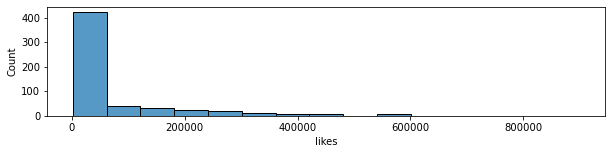

In [39]:
plt.figure(figsize=(10, 2))
sns.histplot(df.likes, bins=15);

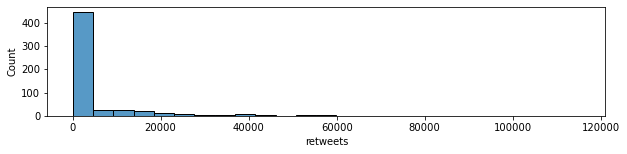

In [40]:
plt.figure(figsize=(10, 2))
sns.histplot(df.retweets, bins=25);

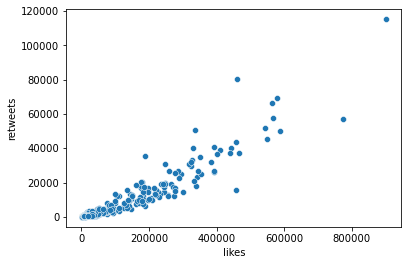

In [41]:
sns.scatterplot(x=df.likes, y=df.retweets);

There we can see a linera correlation between tweets and likes

In [49]:
mean_likes = df[df.likes != 0].groupby(by=[df.datetime.dt.year, df.datetime.dt.month]).agg({'likes': 'mean'})

In [50]:
mean_likes['date'] = [datetime.date(date[0], date[1], 1) for date in mean_likes.index]

In [51]:
mean_likes = mean_likes.set_index(mean_likes['date']).drop('date', axis=1)

<AxesSubplot:xlabel='date', ylabel='likes'>

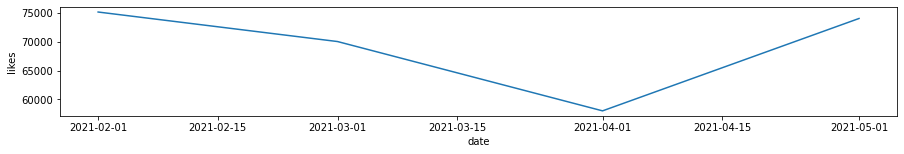

In [52]:
plt.figure(figsize=(15, 2))

sns.lineplot(y=mean_likes.likes, x=mean_likes.index)

<AxesSubplot:xlabel='datetime', ylabel='likes'>

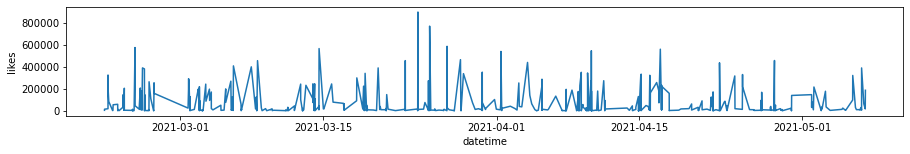

In [48]:
plt.figure(figsize=(15, 2))

sns.lineplot(y=df.likes[df.likes != 0], x=df.datetime[df.likes != 0])

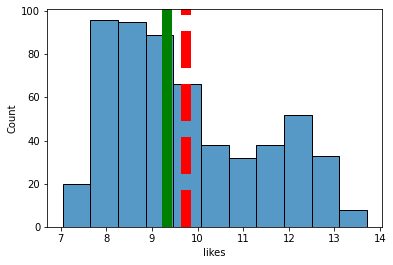

In [46]:
likes_log = np.log(df.likes)

likes_mean = likes_log.mean()
likes_median = likes_log.median()

sns.histplot(likes_log);
plt.axvline(likes_mean, color='r', linestyle='--', linewidth=10);
plt.axvline(likes_median, color='g', linestyle='-', linewidth=10);

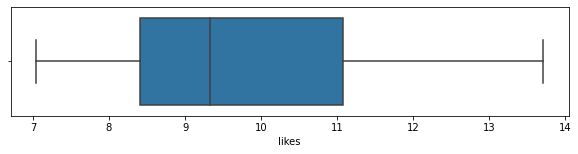

In [47]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=np.log(df.likes));